quef at  40.0


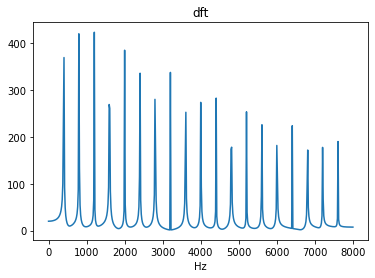

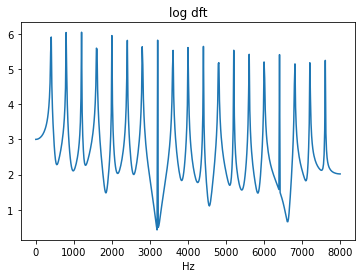

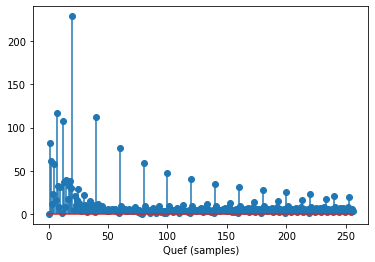

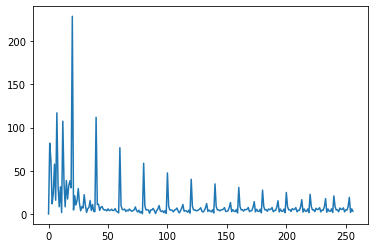

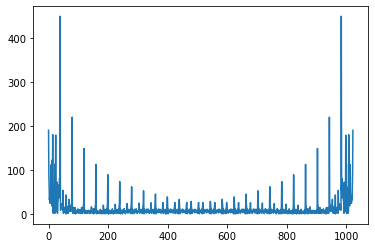

In [16]:
import numpy as np
from numpy.fft import fft, ifft, rfft
from scipy.signal import stft

import matplotlib.pyplot as plt


sr=16000

def create_signal(f0=400, l=2048):
    s = np.zeros(l)
    t = np.linspace(0, l/sr, num=l)
    for i in range(20):
        s += np.sin(2*f0*i*np.pi*t) * (0.95)**i
    return s

f0=400
print('quef at ', sr/f0)
x = create_signal(f0, l=1024)

r_dft = np.abs(rfft(x))
f = np.linspace(0, sr/2, num=r_dft.size)
plt.figure()
plt.title('dft')
plt.plot(f, r_dft)
plt.xlabel('Hz')

log_dft = np.log(r_dft)
plt.figure()
plt.title('log dft')
plt.plot(f, log_dft)
plt.xlabel('Hz')

log_dft -= np.mean(log_dft)
sr1=log_dft.size/f[-1]
ceps = np.abs(rfft(log_dft))

f1=np.linspace(0,sr1/2, num=ceps.size)
plt.figure()
plt.stem(ceps)
plt.xlabel('Quef (samples)')
plt.figure()
plt.plot(ceps[:])


plt.figure()
plt.plot(np.abs(fft(np.log(np.abs(fft(x)))))[1:])

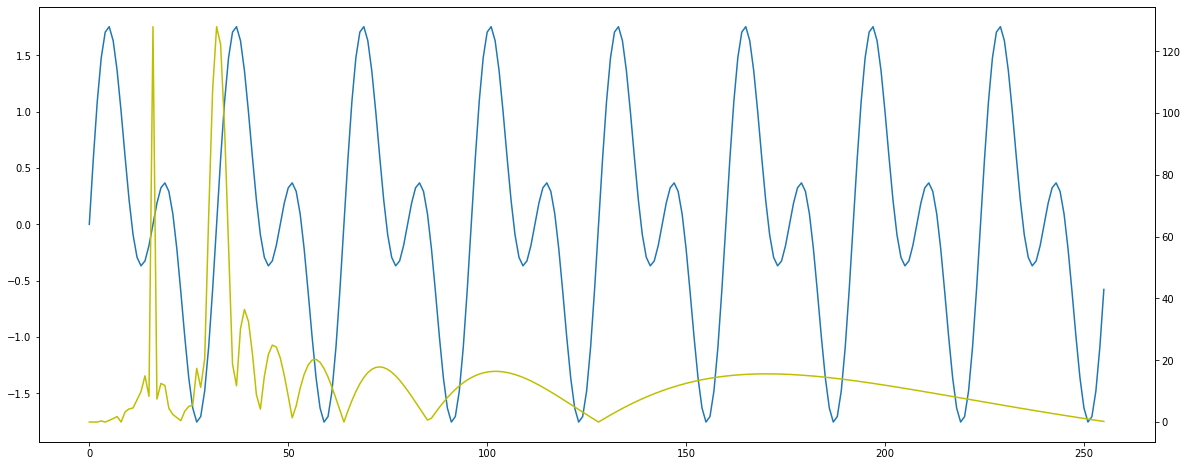

In [10]:
def mod_cepstrum(spec):
    """
    :param spec:
    :return:

    each row i of the "mod-DFT" matrix:
        sinusoid with T=i (f=n/T)


    """
    n = spec.shape[0]
    omega_n = np.e**(-1j * 2 * np.pi / n)

    def get_steering_vector(term):
        if term == 0:
            c = 0
        else:
            c = n / term
        return omega_n ** (np.arange(n) * c)

    base = np.zeros((n,n), dtype=np.complex128)
    for i in range(n):
        base[i, :] = get_steering_vector(i)
    return np.dot(base, spec)


def debug_mod_ceps(signal):
    plt.figure(figsize=(20,8))
    plt.plot(signal)
    mod_ceps = mod_cepstrum(signal)
    plt.twinx()
    plt.plot(np.abs(mod_ceps)[0:], c='y')



def experiment(signal, method):
    plt.figure(figsize=(20,8))
    plt.plot(signal)
    out = method(signal)
    plt.twinx()
    plt.plot(np.abs(out), c='y')




n_samples = 256
T = 16

debug_mod_ceps(np.sin(np.arange(n_samples)*2*np.pi/T)
               +np.sin(np.arange(n_samples)*2*np.pi/(T*2)))

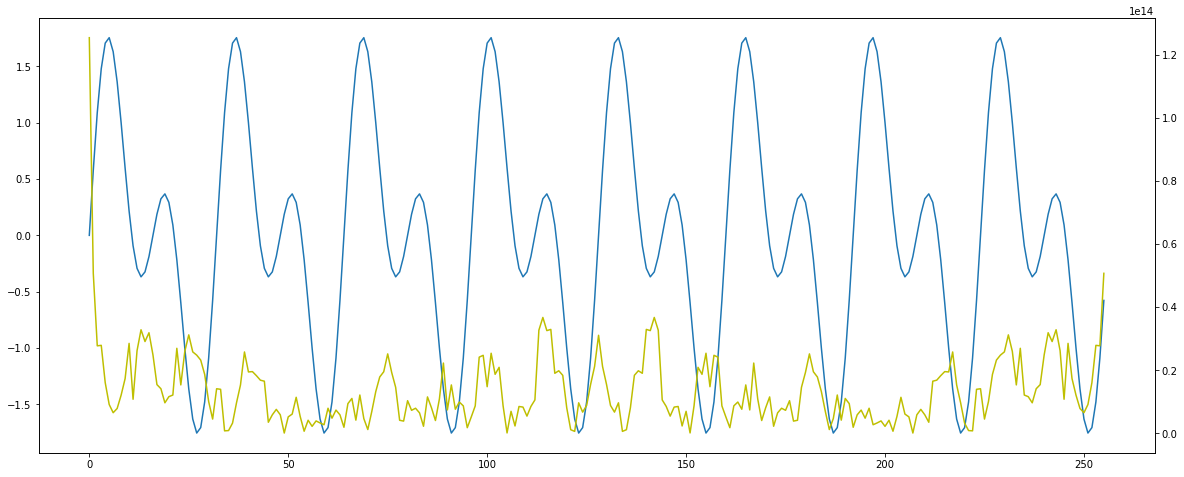

In [11]:
def smoothened_cepstrum(spec):
    spec = (ifft(np.log(np.abs(fft(spec)))))
    return np.abs(ifft(np.exp(np.abs(fft(spec)))))

experiment(np.sin(np.arange(n_samples)*2*np.pi/T)
               +np.sin(np.arange(n_samples)*2*np.pi/(T*2)),
           smoothened_cepstrum)

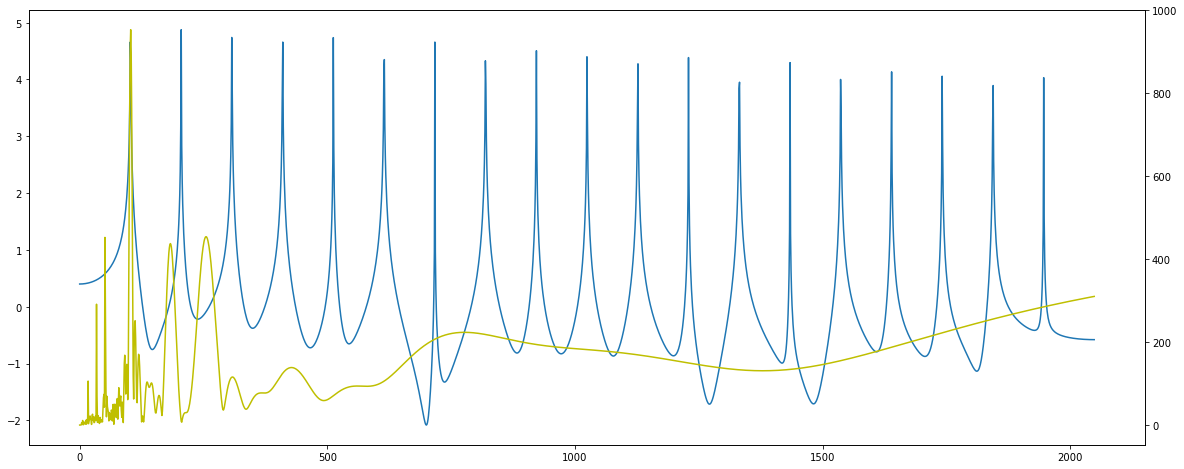

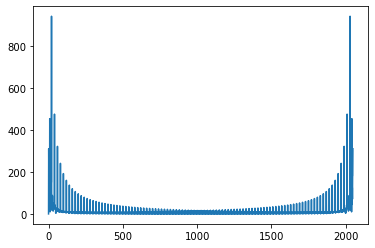

In [12]:
plt.figure(figsize=(20,8))
plt.plot(log_dft)
mod_ceps = mod_cepstrum(log_dft)
plt.twinx()
plt.plot(np.abs(mod_ceps)[0:], c='y')
plt.figure()
plt.plot(np.abs(fft(log_dft)))